In [2]:
import pandas as pd
import numpy as np
import urllib.request, json 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
with open('data.json') as f:
    data=json.load(f)

In [4]:
xx = pd.json_normalize(data)

In [5]:
xx.head()

,isSafe,req.baseUrl,req.body.note.title,req.body.note.desc,req.fresh,req.headers.host,req.headers.user-agent,req.headers.content-type,req.headers.org_id,req.headers.user_session_id,...,req.hostname,req.ip,req.ips,req.originalUrl,req.path,req.protocol,req.secure,req.stale,req.subdomains,req.xhr
0,True,/crm/note,Tina Johnson,Top recognize eat. Fact whom spend area thing ...,False,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,...,example.com,::ffff:117.99.96.244,[],/crm/note,/note,http,False,True,[crm],False
1,True,/crm/note,Clayton Cooper,As possible American many prepare four strong....,False,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,...,example.com,::ffff:117.99.96.244,[],/crm/note,/note,http,False,True,[crm],False
2,False,/crm/note,Curtis Wolfe,Tuesday Notes or 2 like 2 XSP Class,False,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,...,example.com,::ffff:117.99.96.244,[],/crm/note,/note,http,False,True,[crm],False
3,True,/crm/note,Laura Fisher,State third represent energy campaign not forg...,False,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,...,example.com,::ffff:117.99.96.244,[],/crm/note,/note,http,False,True,[crm],False
4,False,/crm/note,Tyler Santos,Us enjoy since. Time identify image position o...,False,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,...,example.com,::ffff:117.99.96.244,[],/crm/note,/note,http,False,True,[crm],False


In [6]:
xx.shape

(1000, 24)

In [7]:
for col in xx.columns: 
    print(col) 

isSafe
req.baseUrl
req.body.note.title
req.body.note.desc
req.fresh
req.headers.host
req.headers.user-agent
req.headers.content-type
req.headers.org_id
req.headers.user_session_id
req.headers.accept
req.headers.content-length
req.headers.user.name
req.headers.user.role
req.hostname
req.ip
req.ips
req.originalUrl
req.path
req.protocol
req.secure
req.stale
req.subdomains
req.xhr


In [8]:
for col in xx.columns: 
    print(xx[col].value_counts())
    print('**********************************************************************************************')

True     572
False    428
Name: isSafe, dtype: int64
**********************************************************************************************
/crm/note    1000
Name: req.baseUrl, dtype: int64
**********************************************************************************************
Michael Smith      3
Heather Smith      2
David Adams        2
Michael Davis      2
Heather Davis      2
                  ..
Stephanie King     1
Jennifer Wagner    1
Colleen Lopez      1
Debra Peterson     1
Melissa Willis     1
Name: req.body.note.title, Length: 994, dtype: int64
**********************************************************************************************
note title <title onPropertyChange title onPropertyChange="javascript:javascript:alert(1)"></title onPropertyChange>                                                                                 36
Meeting ")) or (("x"))=(("x Notes 12:30                                                                                         

###############################################################################################################################
All  columns  except  'isSafe',  'req.body.note.title'  and  'req.body.note.desc'  have  same  element  in  every  rows.
So  we'll  make  a  new  dataframe  with  these  columns  only.
###############################################################################################################################

In [9]:
xy = xx[['isSafe','req.body.note.title','req.body.note.desc']]

In [10]:
xy.head()

,isSafe,req.body.note.title,req.body.note.desc
0,True,Tina Johnson,Top recognize eat. Fact whom spend area thing ...
1,True,Clayton Cooper,As possible American many prepare four strong....
2,False,Curtis Wolfe,Tuesday Notes or 2 like 2 XSP Class
3,True,Laura Fisher,State third represent energy campaign not forg...
4,False,Tyler Santos,Us enjoy since. Time identify image position o...


C:\Users\Rahul\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 19 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Rahul\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 19 missing from current font.
  font.set_text(s, 0, flags=flags)


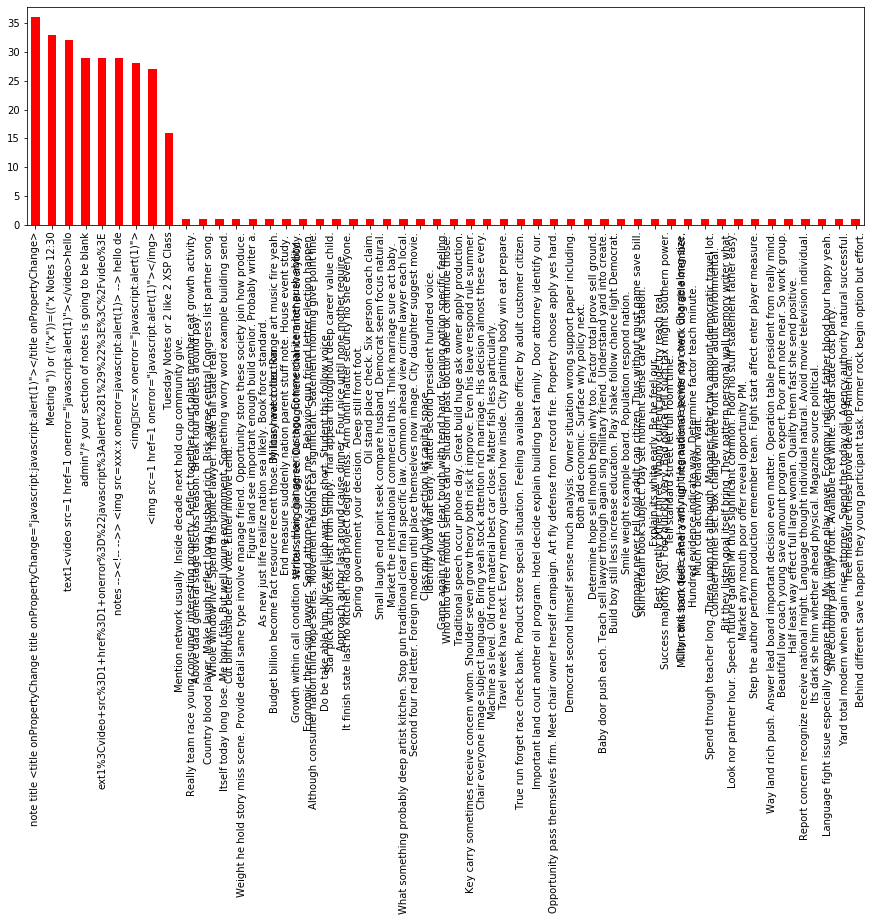

In [11]:
xy['req.body.note.desc'].value_counts()[:50].plot.bar(color = 'red', figsize = (15, 4))

In [12]:
new = xy[['req.body.note.desc','isSafe']]
new.rename(columns={"req.body.note.desc": "desc"}, inplace = True)
new.head()

C:\Users\Rahul\Anaconda3\lib\site-packages\pandas\core\frame.py:4303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,desc,isSafe
0,Top recognize eat. Fact whom spend area thing ...,True
1,As possible American many prepare four strong....,True
2,Tuesday Notes or 2 like 2 XSP Class,False
3,State third represent energy campaign not forg...,True
4,Us enjoy since. Time identify image position o...,False


In [13]:
new.replace({False: 0, True: 1}, inplace=True)
new.head()

C:\Users\Rahul\Anaconda3\lib\site-packages\pandas\core\frame.py:4384: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,desc,isSafe
0,Top recognize eat. Fact whom spend area thing ...,1
1,As possible American many prepare four strong....,1
2,Tuesday Notes or 2 like 2 XSP Class,0
3,State third represent energy campaign not forg...,1
4,Us enjoy since. Time identify image position o...,0


In [16]:
new['desc'].value_counts()

note title <title onPropertyChange title onPropertyChange="javascript:javascript:alert(1)"></title onPropertyChange>                                                                                 36
Meeting ")) or (("x"))=(("x Notes 12:30                                                                                                                                                              33
text1<video src=1 href=1 onerror="javascript:alert(1)"></video>hello                                                                                                                                 32
admin"/* your section of notes is going to be blank                                                                                                                                                  29
ext1%3Cvideo+src%3D1+href%3D1+onerror%3D%22javascript%3Aalert%281%29%22%3E%3C%2Fvideo%3E                                                                                                             29


In [21]:
#text cleaning
#text cleaning
import re
def cleantxt(text):
    text = re.sub(r'[^\w]', ' ', text)
    return text
new['desc'] = new['desc'].apply(cleantxt)
print(new.head())

                                                desc  isSafe
0  Top recognize eat  Fact whom spend area thing ...       1
1  As possible American many prepare four strong ...       1
2                Tuesday Notes or 2 like 2 XSP Class       0
3  State third represent energy campaign not forg...       1
4  Us enjoy since  Time identify image position o...       0


C:\Users\Rahul\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


Text(0.5, 1.0, 'Frequently Occuring Words - Top 50')

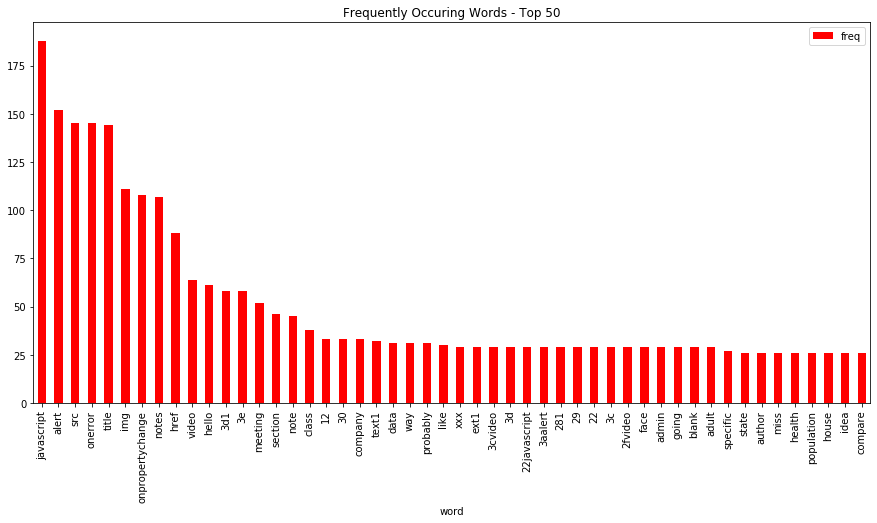

In [22]:
#building vocabulary of words of 'desc'
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(new.desc)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(50).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'red')
plt.title("Frequently Occuring Words - Top 50")

Text(0.5, 1.0, 'WordCloud - Vocabulary')

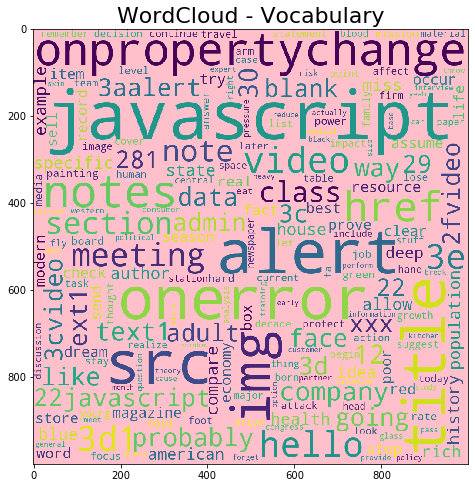

In [23]:
#building cloud of words in desc
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'pink', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary", fontsize = 22)

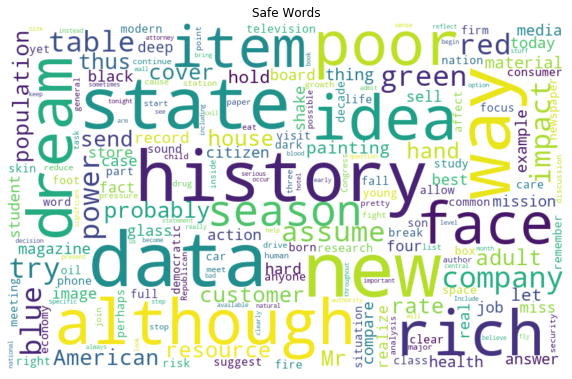

In [24]:
#building cloud of safe words of desc with isSafe=1 (True)
safe_words =' '.join([text for text in new['desc'][new['isSafe'] == 1]])

wordcloud = WordCloud(background_color = 'white',width=800, height=500, random_state = 0, max_font_size = 110).generate(safe_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Safe Words')
plt.show()

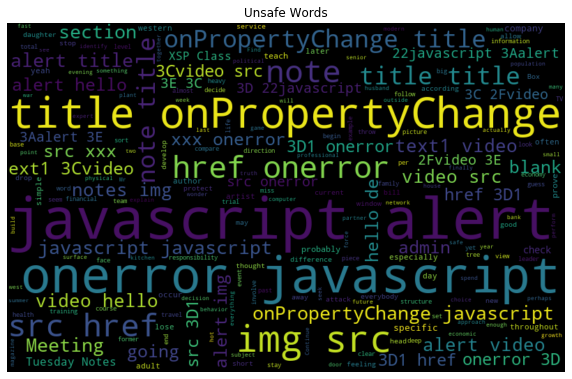

In [25]:
#building cloud of unsafe words of desc with isSafe=0 (False)
unsafe_words =' '.join([text for text in new['desc'][new['isSafe'] == 0]])

wordcloud = WordCloud(background_color = 'black',width=800, height=500, random_state = 0, max_font_size = 110).generate(unsafe_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Unsafe Words')
plt.show()

In [26]:
# tokenizing the words present in 'desc' column
tokenized_desc = new['desc'].apply(lambda x: x.split()) 

# importing gensim
import gensim

# creating a word to vector model
model_w2v = gensim.models.Word2Vec(
            tokenized_desc,
            size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_desc, total_examples= len(new['desc']), epochs=20)

(363966, 383000)

In [27]:
#importing tqdm
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models.doc2vec import LabeledSentence

C:\Users\Rahul\Anaconda3\lib\site-packages\tqdm\std.py:670: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [28]:
#Adding label to the tokenized desc
def add_label(dsc):
    output = []
    for i, s in zip(dsc.index, dsc):
        output.append(LabeledSentence(s, ["desc_" + str(i)]))
    return output

# label all the desc
labeled_desc = add_label(tokenized_desc)

labeled_desc[:5]

C:\Users\Rahul\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `LabeledSentence` (Class will be removed in 4.0.0, use TaggedDocument instead).
  """


[LabeledSentence(words=['Top', 'recognize', 'eat', 'Fact', 'whom', 'spend', 'area', 'thing', 'material', 'War', 'no', 'recent', 'also', 'message', 'four', 'billion', 'Water', 'those', 'deep', 'Word', 'amount', 'table', 'entire', 'Drug', 'several', 'the', 'amount', 'live', 'newspaper'], tags=['desc_0']),
 LabeledSentence(words=['As', 'possible', 'American', 'many', 'prepare', 'four', 'strong', 'Visit', 'care', 'be', 'organization', 'everyone', 'kitchen', 'development', 'magazine', 'Range', 'realize', 'direction', 'wife', 'capital', 'move'], tags=['desc_1']),
 LabeledSentence(words=['Tuesday', 'Notes', 'or', '2', 'like', '2', 'XSP', 'Class'], tags=['desc_2']),
 LabeledSentence(words=['State', 'third', 'represent', 'energy', 'campaign', 'not', 'forget', 'there', 'Experience', 'send', 'these', 'just', 'heart', 'suggest', 'Study', 'paper', 'common', 'car', 'kitchen', 'it', 'Such', 'time', 'management', 'tree', 'Real', 'like', 'agency', 'rule'], tags=['desc_3']),
 LabeledSentence(words=['Us'

In [29]:
# importing nltk and others
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
# removing unwanted patterns from the 'desc'
train_corpus = []

for i in range(0, 1000):
  review = re.sub('[^a-zA-Z]', ' ', new['desc'][i])
  review = review.lower()
  review = review.split()
  
  ps = PorterStemmer()
  
  # stemming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  
  # joining them back with space
  review = ' '.join(review)
  train_corpus.append(review)

In [31]:
# creating bag of words of 'train' data

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x = cv.fit_transform(train_corpus).toarray()
y = new.iloc[:, 1]

print(x.shape)
print(y.shape)
y.head()

(1000, 860)
(1000,)


0    1
1    1
2    0
3    1
4    0
Name: isSafe, dtype: int64

In [32]:
# splitting the 'train' data into training and validation sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 42)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size = 0.2, random_state = 42)

print(x_train.shape)
print(x_valid.shape)
print(x_test.shape)
print(y_train.shape)
print(y_valid.shape)
print(y_test.shape)

(720, 860)
(180, 860)
(100, 860)
(720,)
(180,)
(100,)


In [33]:
# standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)
x_test = sc.transform(x_test)


In [34]:
#importing libraries of various models 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [35]:
#Applying various classification models and finding best out of them
models = [RandomForestClassifier(),LogisticRegression(),DecisionTreeClassifier()]
max_valid_acc = 0
for model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_valid)
    
    train_acc = model.score(x_train, y_train)
    valid_acc = model.score(x_valid, y_valid)
    print('*********Model: ',str(model). split('(')[0],'*********')
    print("Training Accuracy :", train_acc)
    print("Validation Accuracy :", valid_acc)
    if valid_acc>max_valid_acc:
        max_valid_acc = valid_acc
        best_model = model
        
    # calculating the f1 score for the validation set
    print("f1 score (Validation Set):", f1_score(y_valid, y_pred))

    # confusion matrix
    cm = confusion_matrix(y_valid, y_pred)
    print('Confusion Matrix for Validation Set')
    print(cm)
    
print('###################################################################################')
print('Best Model : ',str(best_model).split('(')[0])
print('Validation Accuracy for Best Model  ', max_valid_acc)
    

C:\Users\Rahul\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Rahul\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


*********Model:  RandomForestClassifier *********
Training Accuracy : 0.9902777777777778
Validation Accuracy : 0.7555555555555555
f1 score (Validation Set): 0.7904761904761904
Confusion Matrix for Validation Set
[[53 28]
 [16 83]]
*********Model:  LogisticRegression *********
Training Accuracy : 1.0
Validation Accuracy : 0.7111111111111111
f1 score (Validation Set): 0.7346938775510204
Confusion Matrix for Validation Set
[[56 25]
 [27 72]]
*********Model:  DecisionTreeClassifier *********
Training Accuracy : 1.0
Validation Accuracy : 0.6722222222222223
f1 score (Validation Set): 0.6878306878306878
Confusion Matrix for Validation Set
[[56 25]
 [34 65]]
###################################################################################
Best Model :  RandomForestClassifier
Validation Accuracy for Best Model   0.7555555555555555


In [36]:
#Predicting label of test data using best model obtained
y_test = best_model.predict(x_test)
test_pred['label']=y_test
test_pred.head()

NameError: name 'test_pred' is not defined

In [37]:
test_acc = best_model.score(x_test, y_test)
print(test_acc)

1.0
